<a href="https://colab.research.google.com/github/Arjun-P-Dinesh/2348506_Lab9/blob/main/2348506_Lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import\
accuracy_score, precision_score, recall_score, f1_score,\
roc_curve, PrecisionRecallDisplay, classification_report
from sklearn.svm import SVC as svc
import seaborn as sb

In [4]:
path = '/content/drive/MyDrive/lab9/BrainTumorClassification/Training'
classes = {'no_tumor': 0, 'pituitary_tumor': 1}
x = []
y = []

In [5]:
for cls in classes:
  pth = os.path.join(path, cls)
  for j in os.listdir(pth):
    img = cv2.imread(os.path.join(pth, j), 0)
    img = cv2.resize(img, (200, 200))
    x.append(img)
    y.append(classes[cls])

In [6]:
x = np.array(x)
y = np.array(y)

In [7]:
pd.Series(y).value_counts()

1    827
0    395
dtype: int64

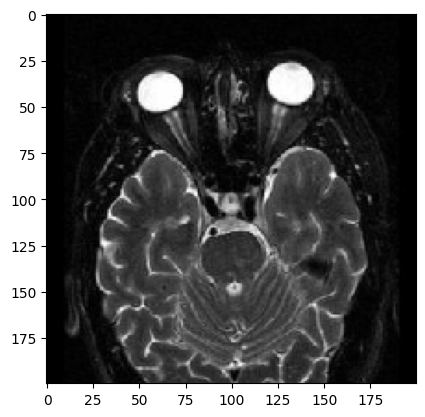

In [8]:
pt.imshow(x[0], cmap='gray');

In [9]:
x = x.reshape(len(x), -1)


In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10,test_size=.20)

In [15]:
sv = svc()

In [16]:
sv.fit(x_train, y_train)

SVC()

In [17]:
print("Training Score:", sv.score(x_train, y_train))
print("Testing Score:", sv.score(x_test, y_test))

Training Score: 0.9918116683725691
Testing Score: 0.9428571428571428


In [18]:
ages = []
for i in range(1232):
  ages.append(np.random.randint(30,90))

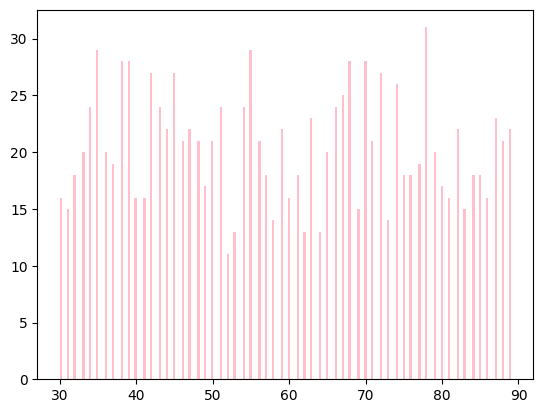

In [19]:
pt.hist(ages, bins=200, color='pink');

In [29]:
sb.heatmap(np.corrcoef(ages, y), annot=True, cmap='flare', linewidths=6,\
           xticklabels=['age', 'tumor'], yticklabels=['age', 'tumor']);

ValueError: ignored

In [22]:
y_pred = sv.predict(x_test)

In [23]:
print('the precision score is',precision_score(y_test, y_pred))
print('the recall score is',recall_score(y_test, y_pred))
print('the f1-score is',f1_score(y_test, y_pred))

the precision score is 0.936046511627907
the recall score is 0.9817073170731707
the f1-score is 0.9583333333333333


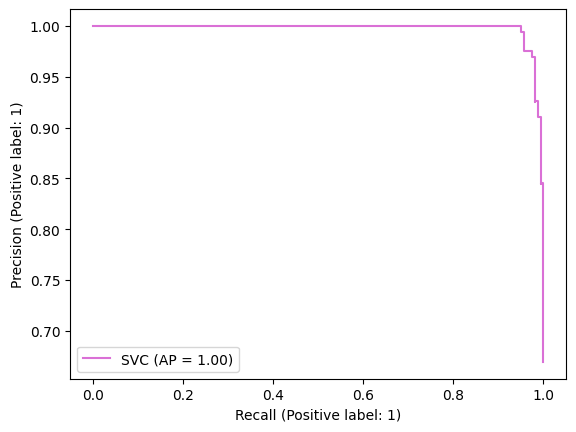

In [24]:
PrecisionRecallDisplay.from_estimator(sv, x_test, y_test, color='orchid');

In [ ]:
sv = svc(probability=True)

In [25]:
sv.fit(x_train, y_train)

SVC()

In [26]:

y_pred = sv.predict_proba(x_test)

AttributeError: ignored

In [ ]:
fpr, tpr, thr = roc_curve(y_test, y_pred[:,1])

In [27]:
pt.plot(fpr, tpr, color='orchid')
pt.plot([0, 1], ls="--", color='lightgreen');

NameError: ignored

In [ ]:
` `